## TASK 2    

## Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle.Explore the relationships between variables and identify patterns and trends in the data.

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
titanic_df =pd.read_csv("Titanic-Dataset.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

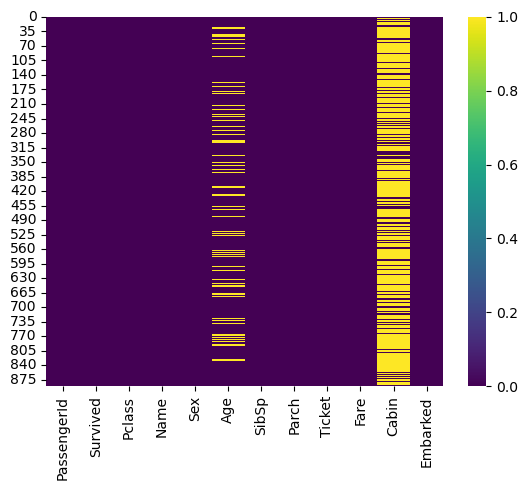

In [23]:
sns.heatmap(titanic_df.isnull(),cmap='viridis')

In [25]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
#Survival probability by Gender

titanic_df['Sex'].value_counts(dropna=False)

Sex
male      577
female    314
Name: count, dtype: int64

In [29]:
titanic_df[['Sex','Survived']].groupby('Sex',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

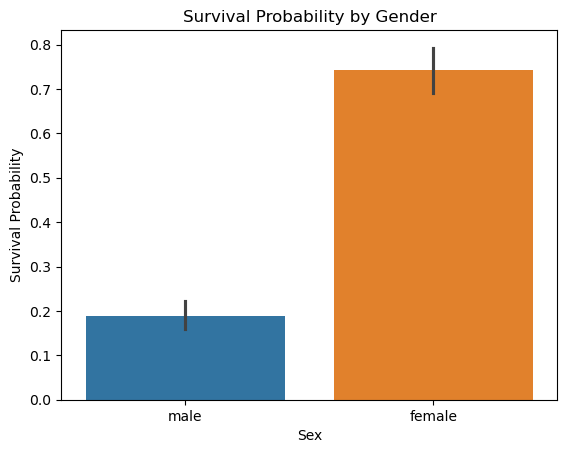

In [55]:
sns.barplot(x='Sex',y='Survived',hue='Sex',data=titanic_df)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Gender")

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [49]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

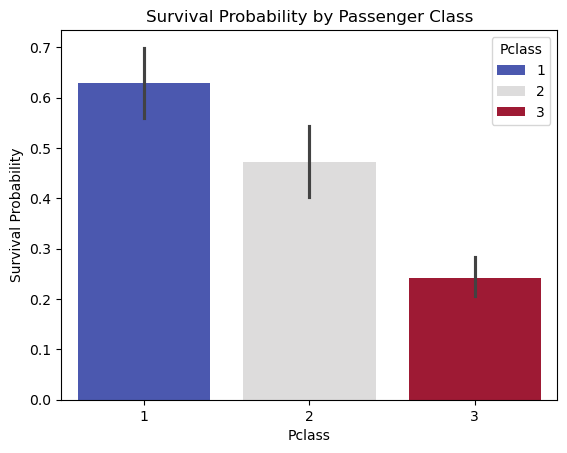

In [65]:
sns.barplot(x = 'Pclass', y ='Survived',hue='Pclass',data = titanic_df,palette='coolwarm')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

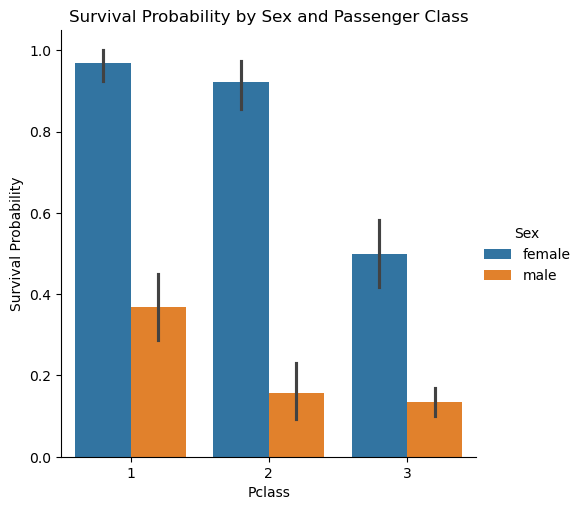

In [85]:
# Survival by gender and passenger class
g = sns.catplot(x='Pclass', y='Survived', hue='Sex', data = titanic_df,kind='bar')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')
plt.show()

Text(0.5, 1.0, 'Passenger Age Distribution')

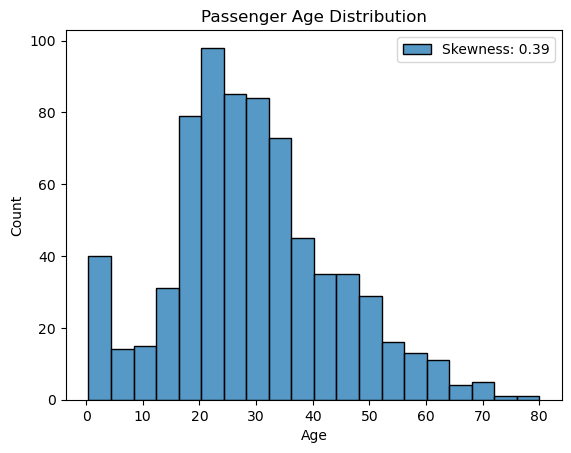

In [99]:
# Passenger age distribution
sns.histplot(titanic_df['Age'], label = 'Skewness: %.2f'%(titanic_df['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

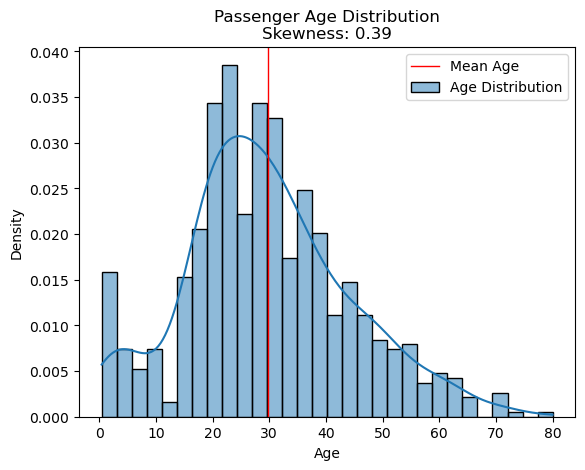

In [105]:
# Calculate skewness
skewness = titanic_df['Age'].skew()

# Create the histogram
sns.histplot(titanic_df['Age'], kde=True, stat='density', bins=30, label='Age Distribution')
plt.axvline(titanic_df['Age'].mean(), color='red', linestyle='solid', linewidth=1, label='Mean Age')

# Add skewness to the legend
plt.legend(loc='best')
plt.title(f'Passenger Age Distribution\nSkewness: {skewness:.2f}')
plt.xlabel('Age')
plt.ylabel('Density')

# Show the plot
plt.show()


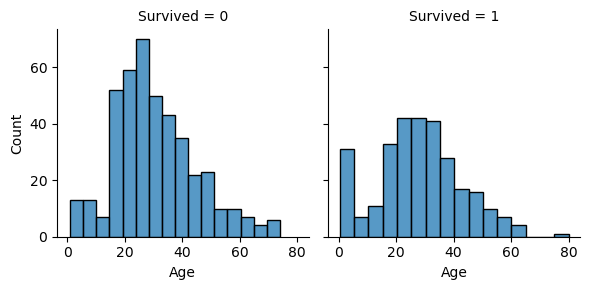

In [119]:
# Age distribution by survival
g = sns.FacetGrid(titanic_df, col = 'Survived')
g.map(sns.histplot, 'Age')

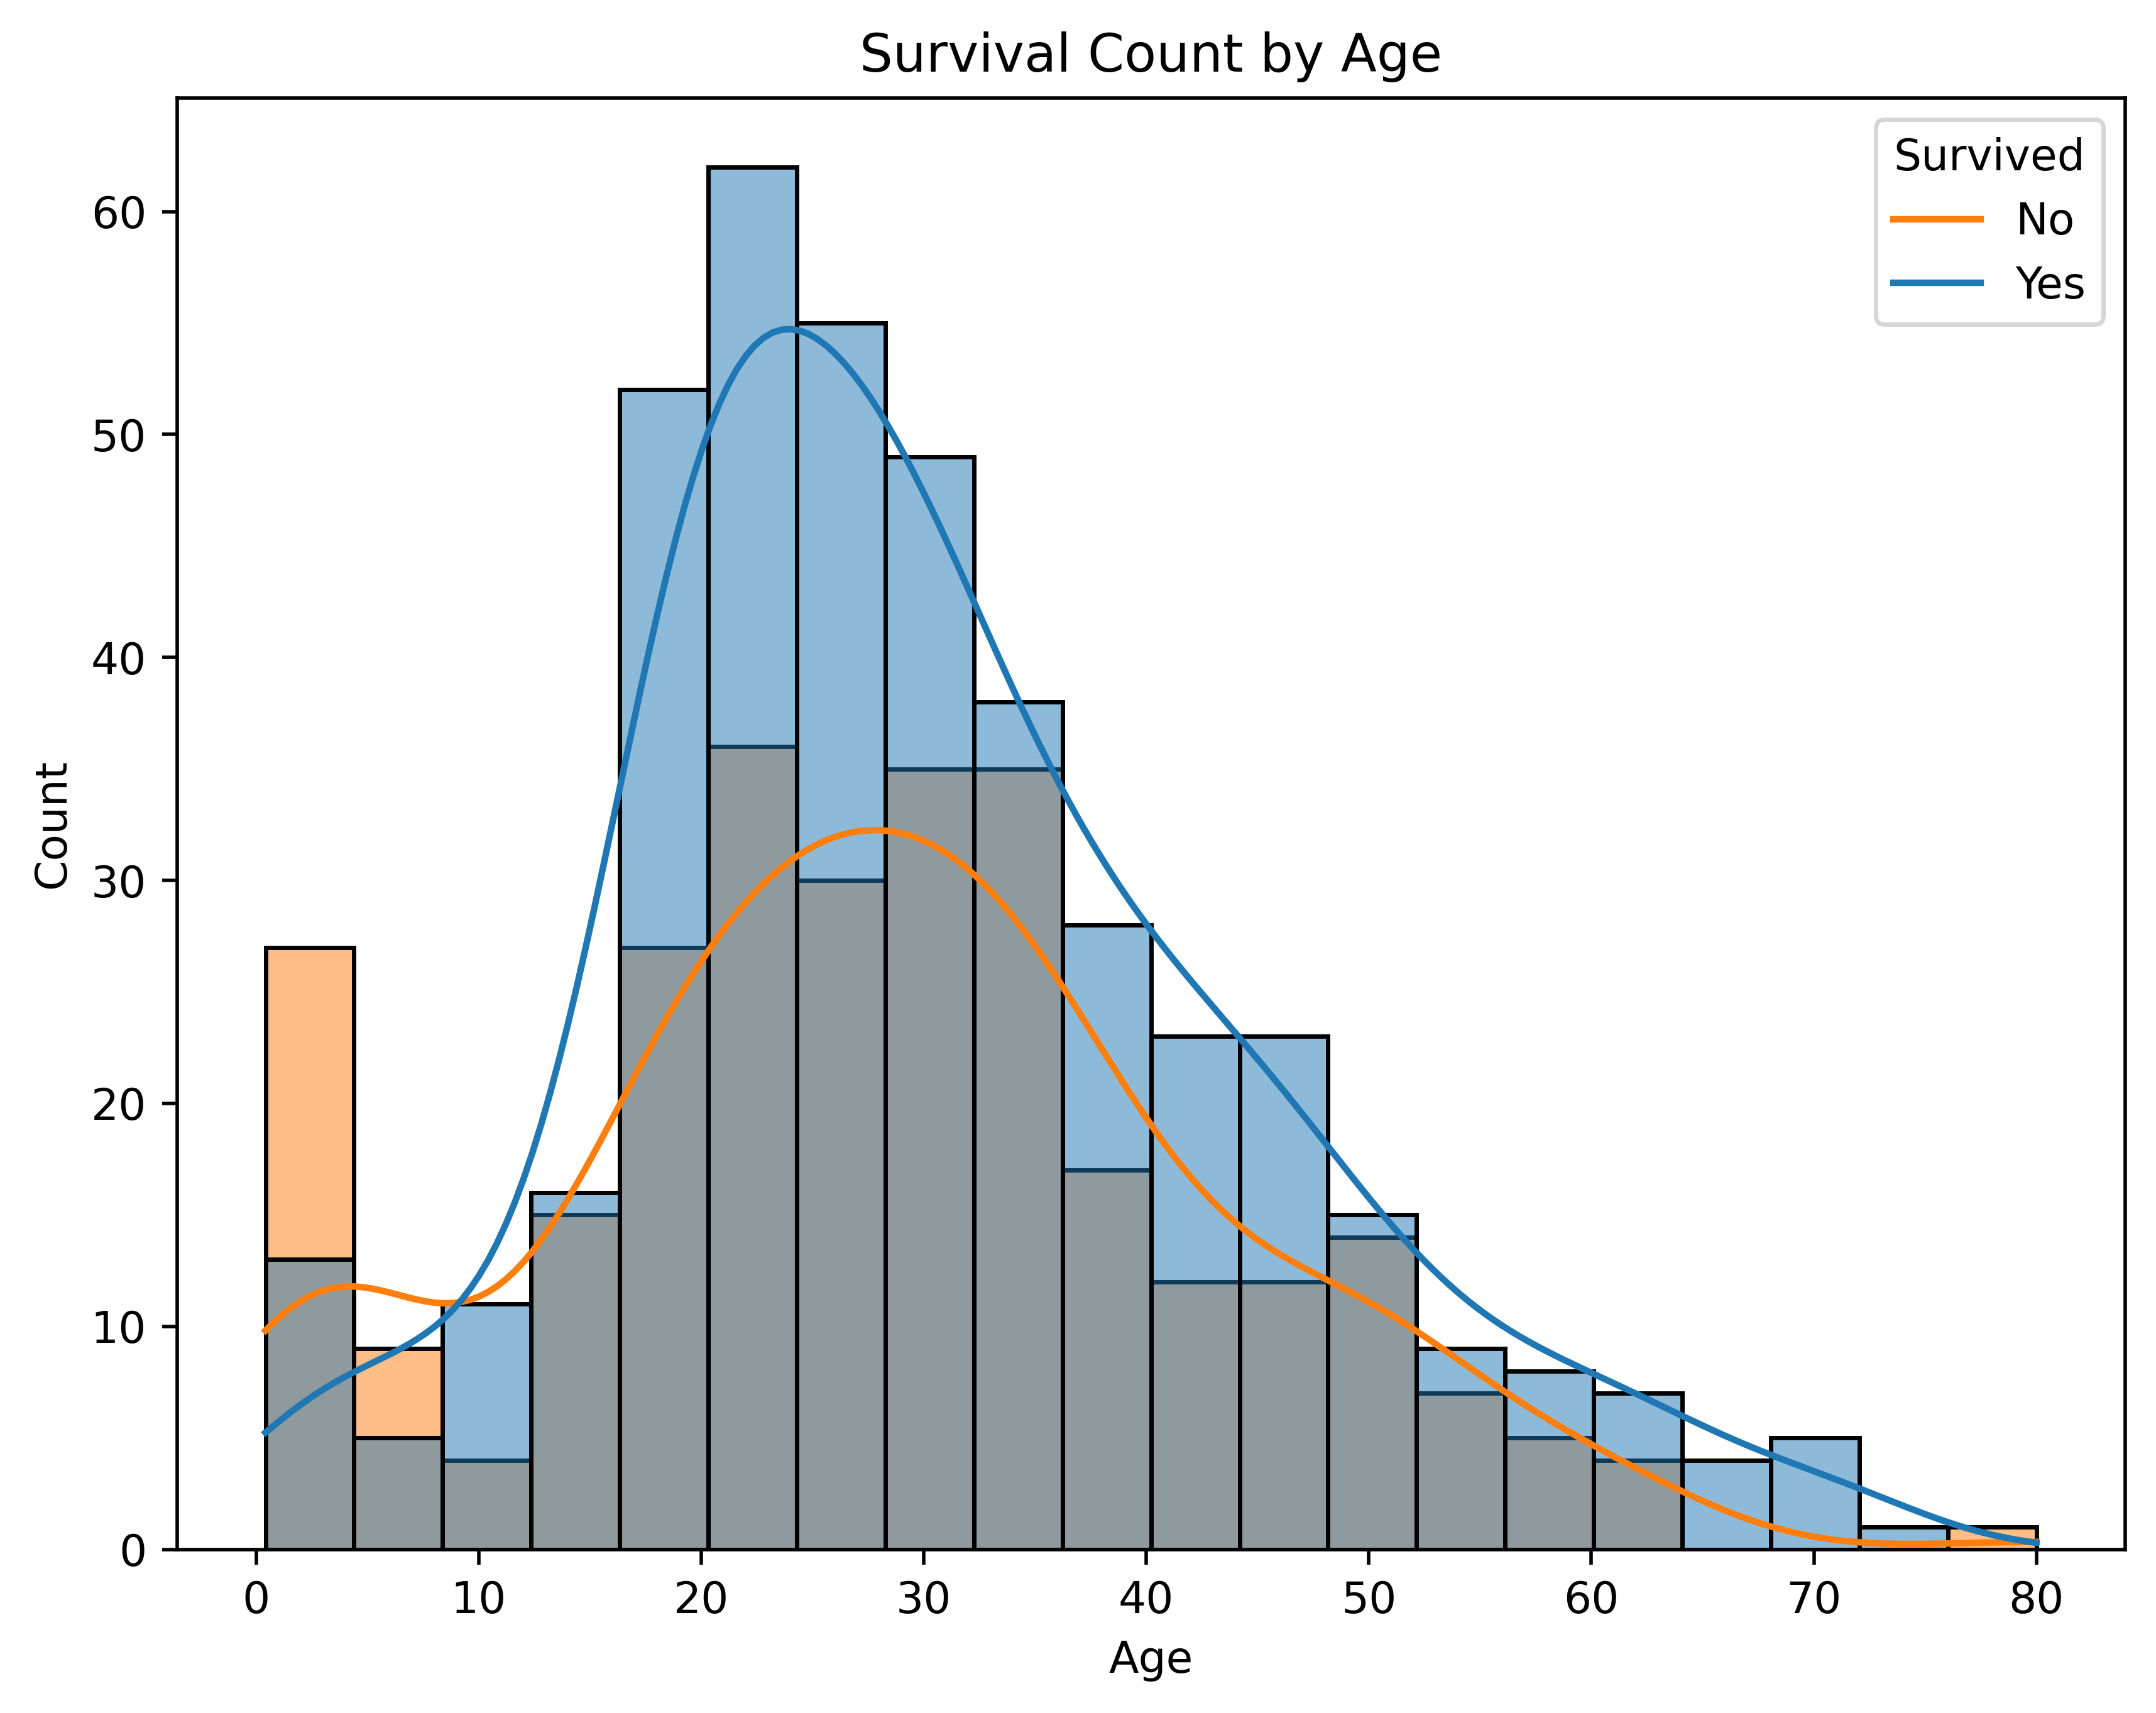

In [127]:
plt.figure(figsize=(8, 6),dpi=500)
sns.histplot(x='Age', hue='Survived', data=titanic_df, kde=True)
plt.title('Survival Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

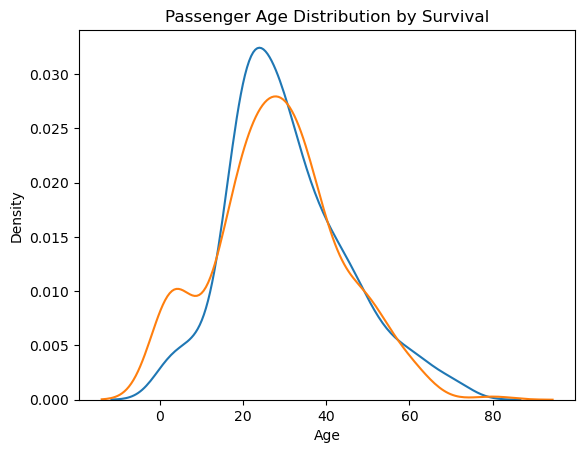

In [129]:
sns.kdeplot(titanic_df['Age'][titanic_df['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(titanic_df['Age'][titanic_df['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

In [131]:
#surviavl probability by point of embarkation
titanic_df['Embarked'].value_counts(dropna = False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [133]:
titanic_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

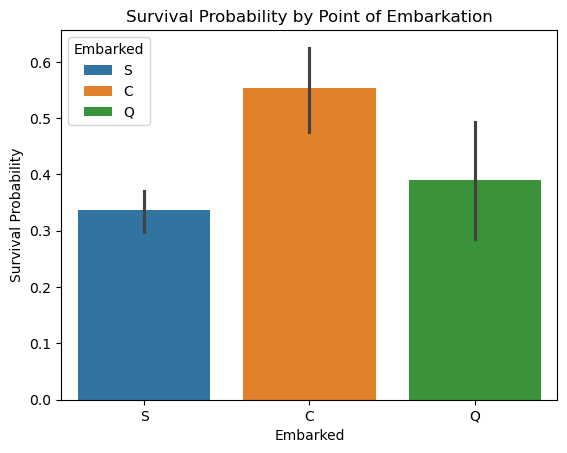

In [137]:
sns.barplot(x = 'Embarked', y ='Survived',hue='Embarked', data = titanic_df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

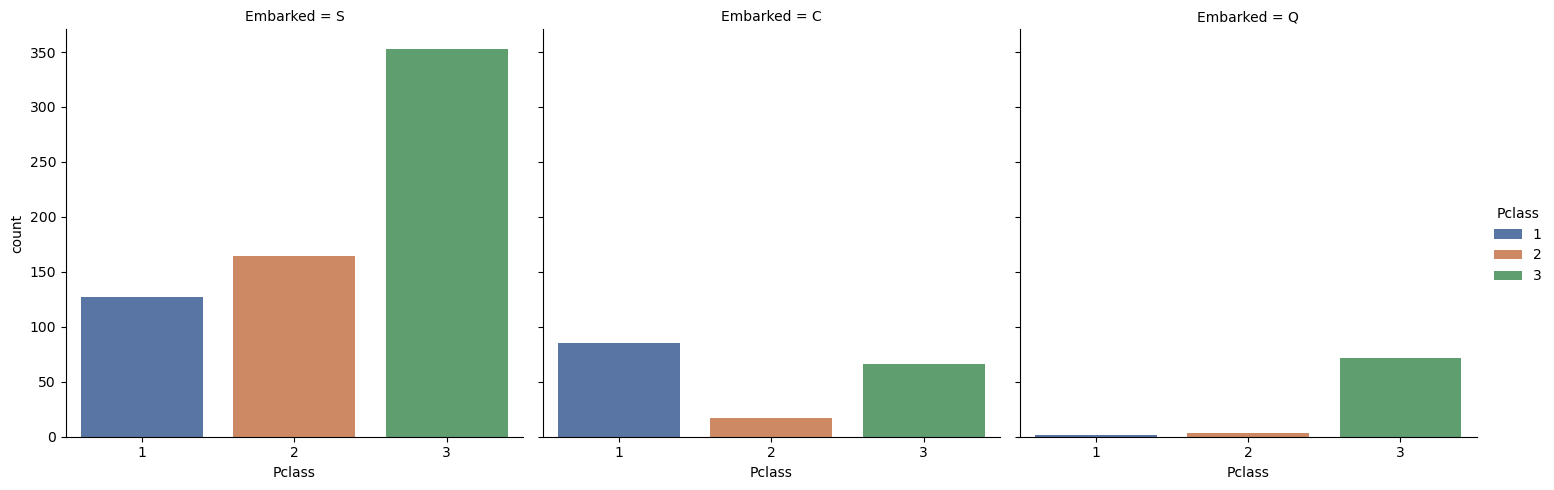

In [163]:
sns.catplot(x='Pclass', col='Embarked',hue='Pclass', data=titanic_df, kind='count',palette='deep')

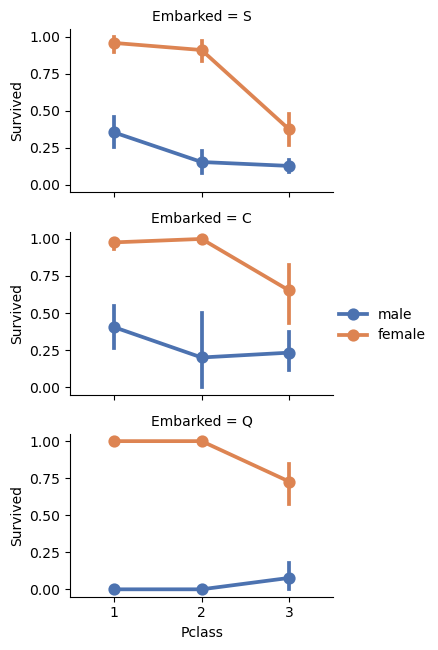

In [161]:
# Survival probability by all categorical variables
grid = sns.FacetGrid(titanic_df, row='Embarked', height=2.2, aspect=1.6)
pclass_order = [1, 2, 3]
sex_order = ['male', 'female']
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',order=pclass_order,hue_order=sex_order, palette='deep')
grid.add_legend()

In [165]:
#correlation heatmap
numeric_cols = titanic_df.select_dtypes(include=np.number).columns
correlation_df = titanic_df[numeric_cols].corr()

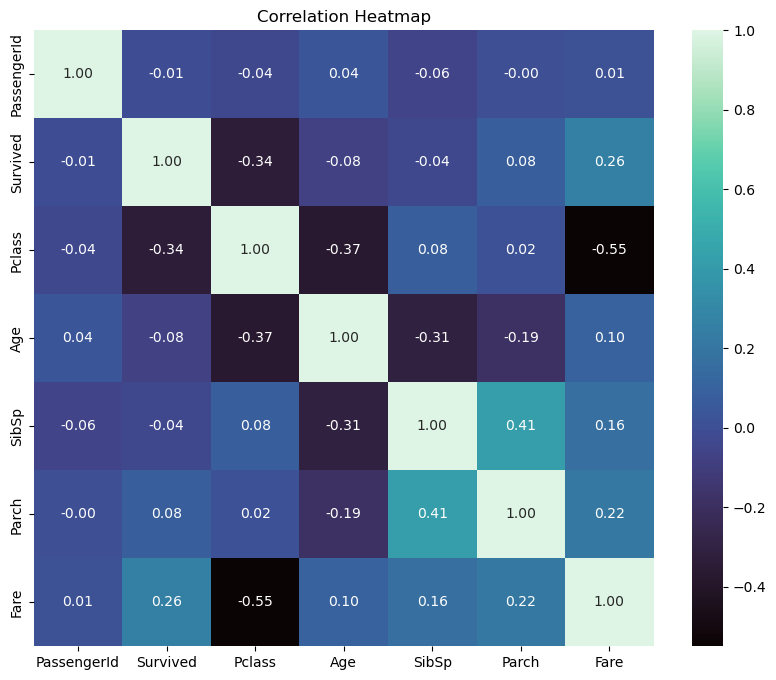

In [167]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='mako', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()